## Single Object Tracking

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tracker():
    print("Choose Tracker : \n")
    print("0 - Boosting")
    print("1 - MIL")
    print("2 - KCF")
    print("3 - TLD")
    print("4 - MEDIANFLOW")
    print("5 - GOTURN")
    print("6 - MOSSE")
    print("7 - CSRT")
    
    choice = input("Select tracker : ")
    
    if choice == '0':
        tracker = cv2.TrackerBoosting_create()
    if choice == '1':
        tracker = cv2.TrackerMIL_create()
    if choice == '2':
        tracker = cv2.TrackerKCF_create()
    if choice == '3':
        tracker = cv2.TrackerTLD_create()
    if choice == '4':
        tracker = cv2.TrackerMedianFlow_create()
    if choice == '5':
        tracker = cv2.TrackerGOTURN_create()
    if choice == '6':
        tracker = cv2.TrackerMOSSE_create()
    if choice == '7':
        tracker = cv2.TrackerCSRT_create()
    
    return tracker

Choose Tracker : 

0 - Boosting
1 - MIL
2 - KCF
3 - TLD
4 - MEDIANFLOW
5 - GOTURN
6 - MOSSE
7 - CSRT
Select tracker : 1


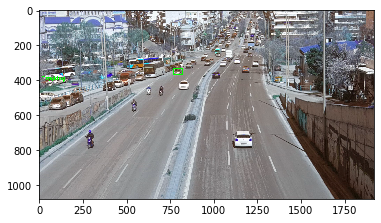

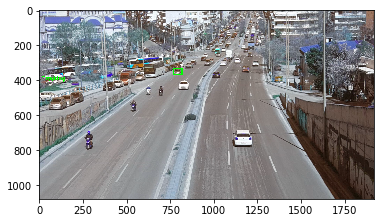

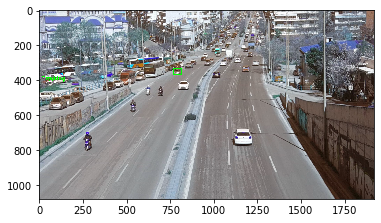

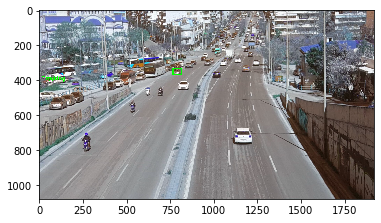

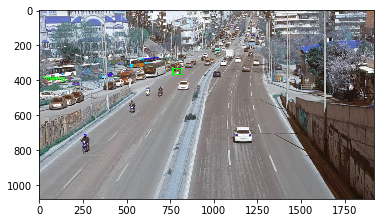

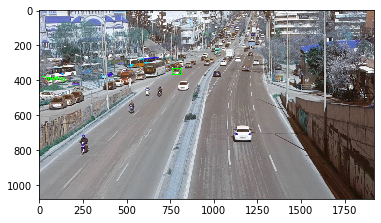

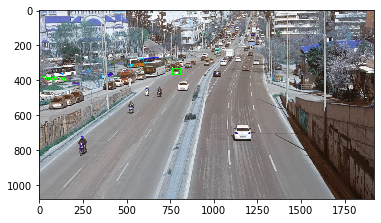

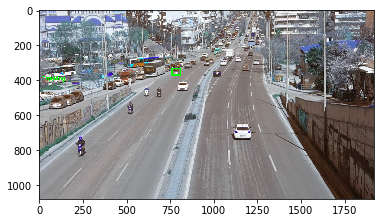

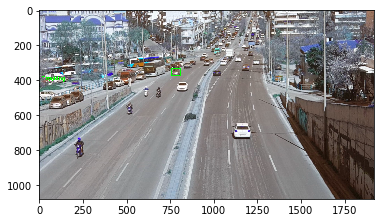

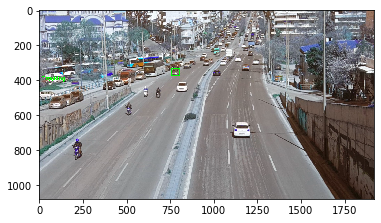

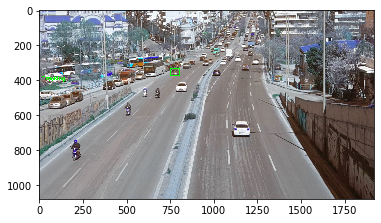

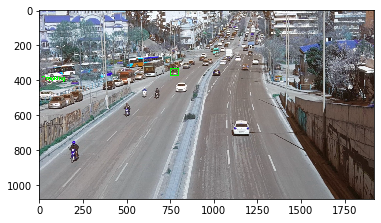

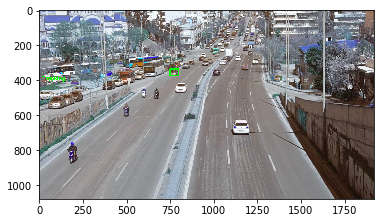

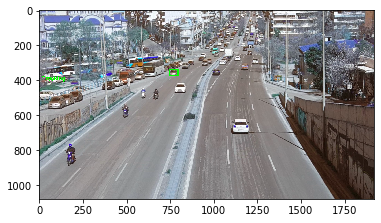

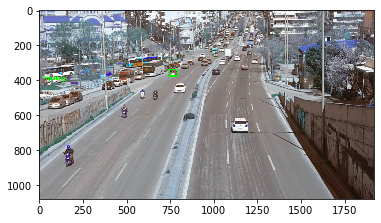

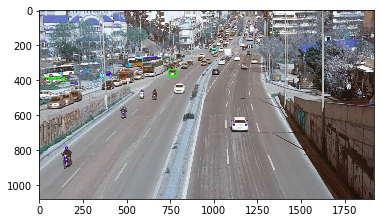

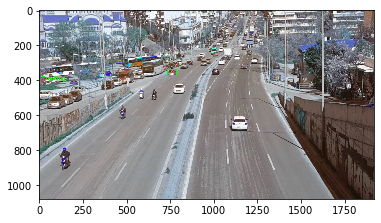

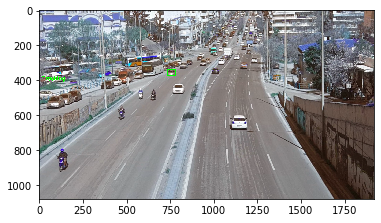

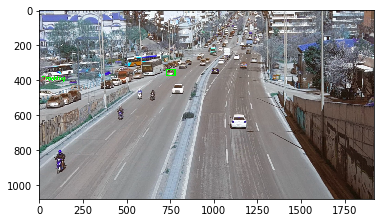

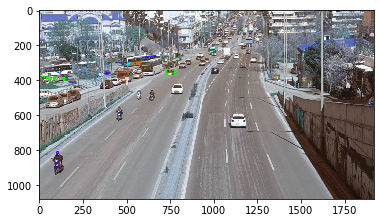

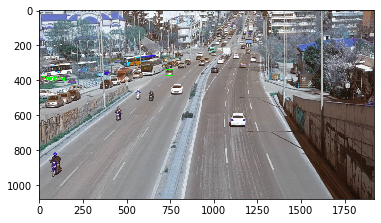

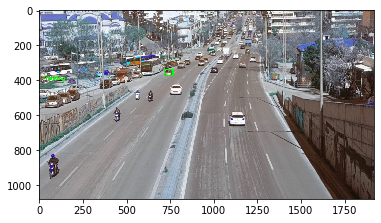

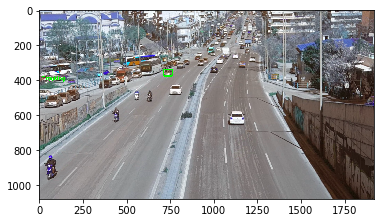

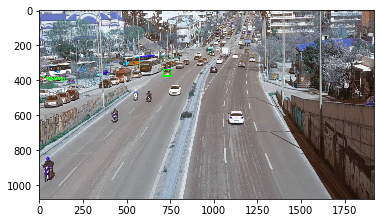

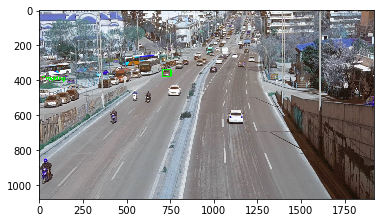

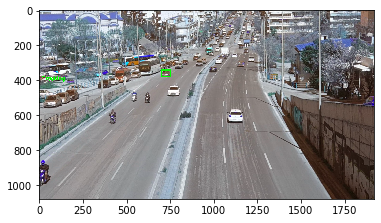

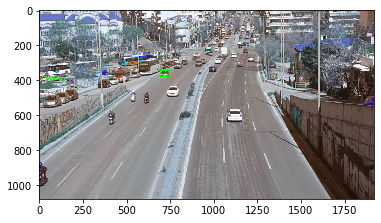

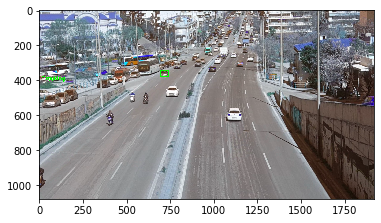

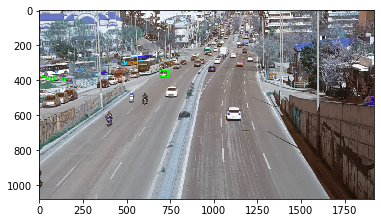

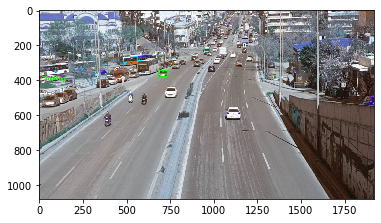

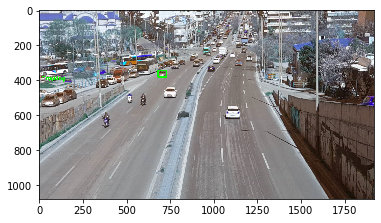

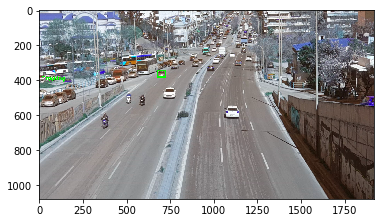

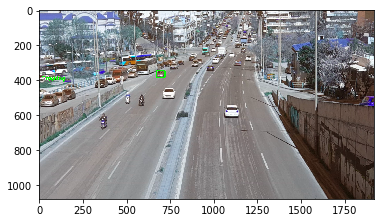

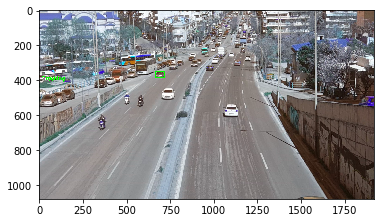

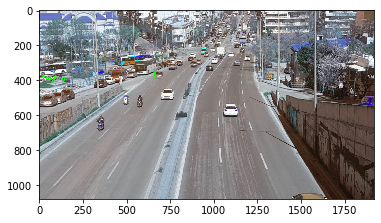

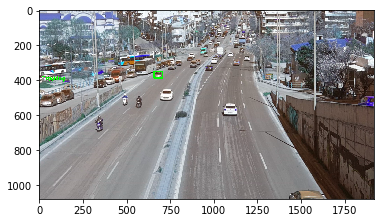

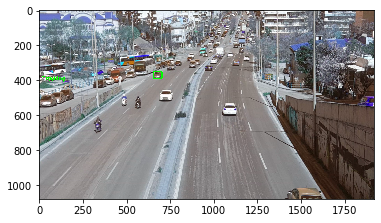

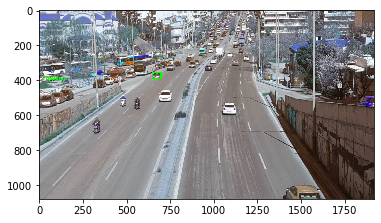

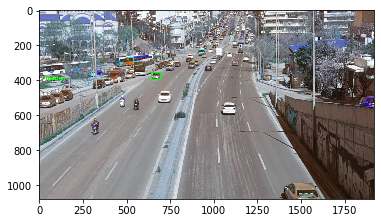

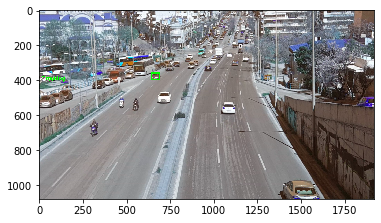

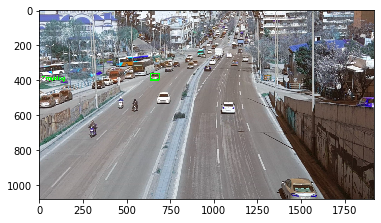

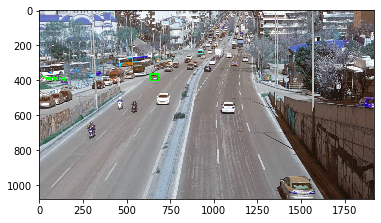

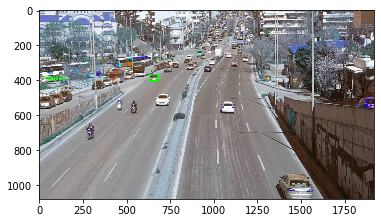

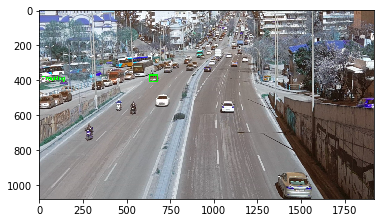

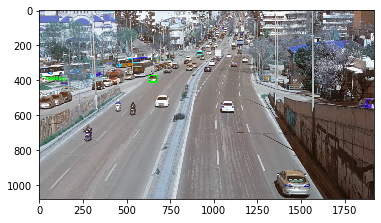

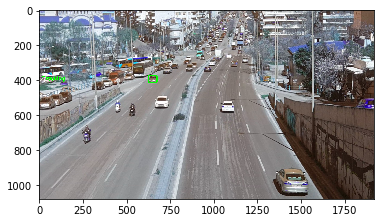

In [3]:
# Tracker
tracker = tracker()


cap = cv2.VideoCapture('Video/Vehicles.mp4')
ret, frame = cap.read()
# setting up roi
roi = cv2.selectROI(frame, False)


# initialize tracker 
ret = tracker.init(frame, roi)

while True:
    ret ,frame = cap.read()    
    # update tracker
    success, roi = tracker.update(frame)    
    # roi -> from tuple to int
    (x,y,w,h) = tuple(map(int, roi))
    
    # Draw rects as tracker moves
    if success:
        # Sucess on tracking
        pts1 = (x,y)
        pts2 = (x+w,y+h)
        cv2.rectangle(frame, pts1, pts2,(0,255,0),5)
    else:
        # Failure on tracking
        cv2.putText(frame, "Fail to track",(100,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
    
    cv2.putText(frame, 'Tracking', (20,400),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
    
    cv2.imshow("Single Object Tracking",frame)
    plt.imshow(frame)
    plt.show()
    
    k = cv2.waitKey(60) & 0xff
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()